   sno  cgpa  interact  pk  cs  jo
0    0     2         1   2   0   1
1    1     1         0   1   1   1
2    2     2         0   0   2   0
3    3     0         0   0   0   0
4    4     1         1   1   1   1
5    5     2         1   1   1   1
6    6     0         1   1   2   0
7    7     2         0   2   0   1
8    8     1         1   1   0   1
9    9     1         1   0   0   1


c:\Users\cluel\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean accuracy: 0.70


[Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 10]')]

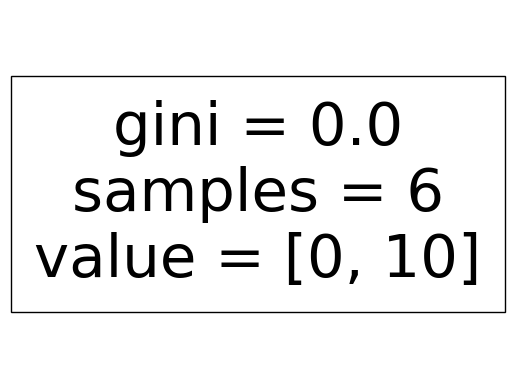

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import pandas as pd
import numpy as np


data = pd.read_csv('DT.csv')

L = LabelEncoder()

new_data = data.apply(L.fit_transform)
print(new_data)

# features
X = new_data.drop(columns=['jo'])
y = new_data['jo']


# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Use cross-validation to get the mean accuracy of the classifier
scores = cross_val_score(clf, X, y, cv=5)
mean_accuracy = np.mean(scores)
print(f'Mean accuracy: {mean_accuracy:.2f}')

# select the best descision tree from the random forest
clf.fit(X, y)
best_tree = clf.estimators_[np.argmax(clf.feature_importances_)]
# print the tree using the matplotlib library
tree.plot_tree(best_tree)

